In [145]:
import tensorflow as tf
import time
import numpy as np
import cv2
from mxnet import gluon, image
import os
import matplotlib.pyplot as plt
import uuid

In [146]:
def load_data_pikachu(batch_size, edge_size=256):  # edge_size：输出图像的宽和高
    data_dir = './images/mini-object-detection/pikachu'
#     _download_pikachu(data_dir)
    train_iter = image.ImageDetIter(
        path_imgrec=os.path.join(data_dir, 'train.rec'),
        path_imgidx=os.path.join(data_dir, 'train.idx'),
        batch_size=batch_size,
        data_shape=(3, edge_size, edge_size),  # 输出图像的形状
        shuffle=True,  # 以随机顺序读取数据集
        rand_crop=1,  # 随机裁剪的概率为1
        min_object_covered=0.95, max_attempts=200)
    val_iter = image.ImageDetIter(
        path_imgrec=os.path.join(data_dir, 'val.rec'), batch_size=batch_size,
        data_shape=(3, edge_size, edge_size), shuffle=False)
    return train_iter, val_iter

In [147]:
train_iter, _ = load_data_pikachu(64, 256)

In [148]:
idx_file = open("index.txt", "w")
for batch in train_iter:
    datas = batch.data[0]
    labels = batch.label[0].reshape(64, 5).asnumpy()
    imgs = datas.asnumpy().astype(np.uint8).transpose(0, 2, 3, 1)
    for img, label in zip(imgs, labels):
        name = uuid.uuid1()
        cv2.imwrite("pi/%s.png" % name, img[:,:,::-1])
        idx_file.write("%s,%d,%d,%d,%d,%d\n" %(name, int(label[1] * 256), int(label[2] * 256), int((label[3] - label[1]) * 256), int((label[4] - label[2]) * 256), 1))

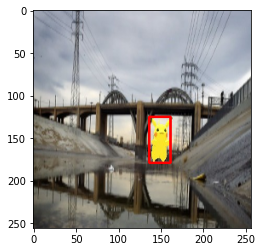

In [87]:
plt.imshow(cv2.rectangle(np.array(a, dtype=np.uint8), (b, c), (d, e), color=(255, 0, 0), lineType=8, thickness=2, shift=0))

In [150]:

img = cv2.imread("pi/35433c86-e8db-11ea-933f-b5a29be13390.png")

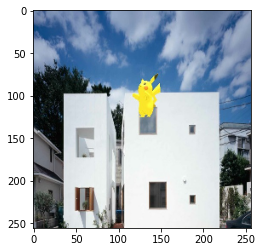

In [151]:
plt.imshow(img[:,:,::-1])

In [154]:
(x, y, w, h, c) = (116, 76, 35, 49, 1)

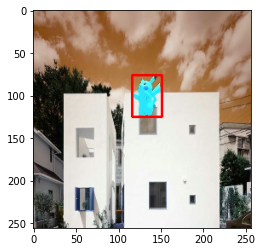

In [161]:
plt.imshow(cv2.rectangle(img, (x, y), (x + w, y + h),color=(255, 0, 0), lineType=8, thickness=2, shift=0))